## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Steps to Be Performed:

### Cleaning the Data:

1. Handle Missing Values: Identify and address missing data through imputation, estimation, or removal to maintain dataset integrity.

2. Remove Duplicate Entries: Eliminate redundant rows to ensure each data point is unique and reliable.
3. Ensure Consistent Formats: Convert data into uniform formats for seamless analysis (e.g., standardizing date or numeric representations).

### Integrating and Structuring the Data:

1. Standardize Text: Clean and harmonize textual data by converting to lowercase, trimming whitespace, removing special characters, and resolving inconsistencies.

2. Standardize Columns: Refine column structure by renaming for clarity, aligning data types for consistency, and reordering to enhance usability.

3. Select Key Features: Focus on the most relevant columns to streamline analysis and improve model performance.

4. Feature Engineering: Create new variables or transform existing ones to extract deeper insights and enrich the dataset.


### Merging datasets

1. tn and bom using title, left merge
2. imdb and tmdb using original_title, inner merge
3. rt and rt_review using id, inner merge
4. inspect unmatched rows after merging

## OBJECTIES

### General Objective:
#### Analyze movie industry data using exploratory data analysis and predictive modeling to provide insights on successful film types, guiding the studio in creating profitable and market-aligned content.

### Specific Objectives:
#### 1.Identify High-Performing Movie Genres:
#### Analyze the relationship between genres and box office performance to recommend focus areas.


#### 2.Predict Revenue Based on Movie Features:
#### Build a regression model to predict box office revenue using factors like budget, genre, runtime, release date, and ratings.


#### 3.Evaluate Budget vs. Revenue Correlation:
#### Examine how production budgets correlate with box office revenue to determine optimal budget ranges.


#### 4.Seasonal Trends in Box Office Revenue:
#### Explore release dates and revenue to identify seasonal trends, aiding strategic release scheduling.


#### 5.Impact of Movie Cast and Crew on Success:
#### Assess the influence of cast and crew on movie success to guide hiring decisions.


In [1]:
# Importing the required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Connecting to the database
conn = sqlite3.connect('zippedData/im.db')

## Data understanding

#### Dataset 1: Box Office Mojo (bom)

In [2]:
# Reading and loading the dataset
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Dataset 2: The Numbers (tn)

In [3]:
# Reading and loading the dataset
tn = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Dataset 3: Rotten Tomatoes Movies Info (rt_movie_info) Reviews (rt_reviews)

In [4]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


#### Dataset 4: Rotten Tomatoes Reviews (rt_reviews)

In [5]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### Dataset 5: IMDB Database

#### im.db.zip (SQLite Database)

Description: Contains movie-related data from IMDB.

Relevant Tables:

movie_basics: Includes details like title, genres, runtime, and start year.

movie_ratings: Contains average ratings and vote counts for movies.

In [6]:
# Execute SQL query using pandas read_sql() and pass the connection
import sqlite3
import pandas as pd
conn = sqlite3.connect(r"C:\Users\josep\Downloads\Compressed\im.db\im.db")

In [7]:
imdb = pd.read_sql("""SELECT *
                   FROM movie_basics;"""
                   ,conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Dataset 6: TMDB Database

In [8]:
conn = sqlite3.connect("zippedData/tmdb.movies.csv.gz")
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Objective 1.Identify High-Performing Movie Genres:
#### Analyze the relationship between genres and box office performance to recommend focus areas.

In [9]:
# Execute SQL query using pandas read_sql() and pass the connection
import sqlite3
import pandas as pd
conn = sqlite3.connect(r"C:\Users\josep\Downloads\Compressed\im.db\im.db")

In [ ]:
query = "SELECT * FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [11]:
#Select relevant data for computation and set certain cleaning papmeters such as region = US, Death_year Is null and avgrating >=6
imdb = pd.read_sql("""
SELECT mb.movie_id, mb.genres, mr.averagerating AS avg_ratings, mr.numvotes AS num_votes, mk.region, 
pr.category, p.primary_name AS artist_name, mb.runtime_minutes AS screen_time, mb.primary_title AS movie_title, p.death_year
FROM movie_basics mb
JOIN movie_akas mk ON mk.movie_id = mb.movie_id
JOIN movie_ratings mr ON mr.movie_id = mb.movie_id
JOIN principals pr ON pr.movie_id = mb.movie_id
JOIN persons p ON p.person_id = pr.person_id
WHERE mk.region != 'None'
AND p.death_year IS NULL
;""", conn)
#More cleaning using pandas, dropped duplicates, set the defining catagories and dropped missing/empty values from Genre
imdb = imdb.drop_duplicates(subset=['movie_id'])
# Removing duplicate movie names
imdb = imdb.drop_duplicates(subset=['movie_title'])
imdb = imdb.dropna(subset=['genres'])
categories_of_interest = ['actor', 'actress', 'writer', 'director', 'producer']
imdb = imdb[imdb['category'].isin(categories_of_interest)]
#Created a weighted average for rating
imdb['weighted_avg'] = (imdb['avg_ratings'] * imdb['num_votes']) / imdb['num_votes'].sum()
imdb

,movie_id,genres,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg
0,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,1.666936e-02
423,tt0381957,Drama,7.6,23,GB,actor,Derek Jacobi,92.0,Cloud Cuckoo Land,None,7.717939e-07
433,tt0401729,"Action,Adventure,Sci-Fi",6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,7.046051e-03
750,tt10084780,"Drama,Romance",8.3,30,IN,director,Sateesh Chandra Nadella,NaN,Vinara sodara veera kumara,None,1.099409e-06
760,tt1014759,"Adventure,Family,Fantasy",6.5,358813,IE,actor,Johnny Depp,108.0,Alice in Wonderland,None,1.029773e-02
...,...,...,...,...,...,...,...,...,...,...,...
1992082,tt9593792,Horror,6.1,39,TH,director,Mate Yimsomboon,NaN,Ghost Wife,None,1.050399e-06
1992100,tt9644084,Documentary,5.2,5,DE,director,Uli M. Schüppel,95.0,Der Atem,None,1.147977e-07
1992120,tt9657946,Drama,6.0,16,XWW,actor,Marcelo Di Souza,90.0,Homing,None,4.238685e-07
1992144,tt9726638,"Action,Adventure,Comedy",6.0,6,CN,actress,Carman Lee,90.0,Monkey King: The Volcano,None,1.589507e-07


In [12]:
pd.read_sql("""
    SELECT 
        w.*, 
        p.primary_name, 
        ma.title,
        mb.genres,
        ma.language,
        mr.averagerating,
        mr.numvotes
    FROM writers w
    JOIN persons p ON w.person_id = p.person_id
    JOIN movie_basics mb  ON w.movie_id = mb.movie_id
    JOIN movie_akas ma ON w.movie_id = ma.movie_id
    JOIN movie_ratings mr ON w.movie_id = mr.movie_id
    JOIN principals pr USING(movie_id)
    WHERE p.death_year IS NULL
    AND p.primary_profession = 'writer'
    AND (mb.genres LIKE '%Horror%' OR mb.genres LIKE '%Thriller%' OR mb.genres LIKE'%Mystery%')
    AND mr.averagerating >= 7.5
    AND mr.numvotes > 9665
    GROUP BY primary_name
    ORDER BY mr.averagerating DESC
""", conn)

,movie_id,person_id,primary_name,title,genres,language,averagerating,numvotes
0,tt5354160,nm7861818,Adnan Adib Khan,Aynabaji,"Crime,Mystery,Thriller",None,9.3,18470
1,tt8108198,nm4914249,Arijit Biswas,Andhadhun,"Crime,Thriller",None,8.5,43409
2,tt4987556,nm5394336,A.N. Balakrishnan,Double Attack 2,"Action,Crime,Thriller",hi,8.5,13747
3,tt8239946,nm10304029,Narayan Dharap,Tumbbad,"Drama,Fantasy,Horror",None,8.3,14128
4,tt2375559,nm6253319,Hari Prasad Jakka,1 - Nenokkadine,"Action,Mystery,Thriller",None,8.3,41124
5,tt3461252,nm6211716,Ahmed Mourad,Al Feel Al Azrak,"Drama,Horror,Mystery",ar,8.2,21776
6,tt4016934,nm1941029,Seo-kyeong Jeong,A Criada,"Drama,Romance,Thriller",None,8.1,79272
7,tt4016934,nm1258797,Sarah Waters,A Criada,"Drama,Romance,Thriller",None,8.1,79272
8,tt1821480,nm4449370,Nikhil Vyas,A sztori,"Mystery,Thriller",None,8.1,51830
9,tt1821480,nm4298729,Advaita Kala,A sztori,"Mystery,Thriller",None,8.1,51830


In [13]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND
(
primary_title LIKE '%Gallows%' 
OR primary_title LIKE '%Devil Inside%' 
OR primary_title = '%Insidious%' 
OR primary_title = '%Unfriended%' 
OR primary_title LIKE '%Paranormal Activity%' 
OR primary_title = '%Split%' 
OR primary_title = '%Chernobyl Diaries%' 
OR primary_title = '%Annabelle%'
)
AND 
category = 'director'
GROUP BY primary_name
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt3108988,Paranormal Activity Security Squad,Paranormal Activity Security Squad,2016,NaN,"Comedy,Horror",nm2066764,5,nm2066764,director,None,None,Alexander Wraith,1979.0,None,"actor,writer,producer",5.4,13
1,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1413364,5,nm1160962,director,None,None,Ariel Schulman,NaN,None,"writer,producer,director",4.6,58408
2,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",nm3951039,5,nm4000389,director,None,None,Chris Lofing,NaN,None,"producer,director,writer",4.2,17763
3,tt2473682,Paranormal Activity: The Marked Ones,Paranormal Activity: The Marked Ones,2014,84.0,"Horror,Mystery,Thriller",nm0484907,5,nm0484907,director,None,None,Christopher Landon,1975.0,None,"writer,producer,director",5.0,37147
4,tt2417650,30 Nights of Paranormal Activity with the Devi...,30 Nights of Paranormal Activity with the Devi...,2013,80.0,Comedy,nm0608936,5,nm0608936,director,None,None,Craig Moss,NaN,None,"director,writer,producer",2.6,3381
5,tt2473510,Paranormal Activity: The Ghost Dimension,Paranormal Activity: The Ghost Dimension,2015,88.0,"Horror,Mystery,Thriller",nm0687427,5,nm0687427,director,None,None,Gregory Plotkin,NaN,None,"editorial_department,editor,producer",4.6,22361
6,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1160962,5,nm1160962,director,None,None,Henry Joost,NaN,None,"writer,producer,director",4.6,58408
7,tt1990211,The Devil Inside Me,Duo ming xin tiao,2011,90.0,"Horror,Thriller",nm3814942,5,nm3814942,director,None,None,Qi Zhang,NaN,None,"writer,director,actor",5.6,59
8,tt1649749,Demon Exorcism: The Devil Inside Maxwell Bastas,Demon Equation,2013,NaN,Horror,nm3157118,5,nm3157118,director,None,None,Richard G. James,NaN,None,"director,writer,editor",5.5,35
9,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,nm0931095,5,nm0931095,director,None,None,Tod Williams,1968.0,None,"director,writer,producer",5.7,93122


In [14]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND (
    primary_title LIKE '%Gallows%' 
    OR primary_title LIKE '%Devil Inside%' 
    OR primary_title LIKE '%Insidious%' 
    OR primary_title LIKE '%Unfriended%' 
    OR primary_title LIKE '%Paranormal Activity%' 
    OR primary_title LIKE '%Split%' 
    OR primary_title LIKE '%Chernobyl Diaries%' 
    OR primary_title LIKE '%Annabelle%'
)
AND mr.averagerating >= 7.5
AND category IN ('actor', 'actress')
GROUP BY primary_name;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt1537385,Annabelle & Bear,Annabelle & Bear,2010,100.0,Drama,nm3672532,1,nm0557478,actor,None,"[""Bear""]",Amy S. Weber,NaN,None,"producer,director,writer",8.0,53
1,tt3168478,Split Gas,Split Gas,2014,71.0,"Comedy,Drama",nm4839546,1,nm4587628,actress,None,"[""Otey""]",Jacques Edeline,NaN,None,"writer,actor,sound_department",8.3,7
2,tt8451712,Babysplitters,Babysplitters,2019,119.0,Comedy,nm1153627,1,nm0275417,actor,None,"[""Dr. Cooper, MFT""]",Sam Friedlander,1978.0,None,"producer,production_manager,director",9.3,77
3,tt2467370,Split Second,Split Second,2012,83.0,Drama,nm5394959,1,nm4244738,actor,None,"[""Mike Yancey""]",Timothy Fontaine,NaN,None,"cinematographer,editor,director",8.1,11


In [15]:
imdb.columns

Index(['movie_id', 'genres', 'avg_ratings', 'num_votes', 'region', 'category',
       'artist_name', 'screen_time', 'movie_title', 'death_year',
       'weighted_avg'],
      dtype='object')

### Merge The Numbers(tn) with imdb Database

In [16]:
# merge movie_basics and budget on movie and movie_title
merged_tn_imdb = pd.merge(imdb, tn, left_on="movie_title", right_on="movie", how="inner")

In [17]:
# Using str.split() and str.get() to extract the first genre
merged_tn_imdb['main_genre'] = merged_tn_imdb['genres'].str.split(',').str.get(0)
merged_tn_imdb

,movie_id,genres,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,main_genre
0,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.016669,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Action
1,tt0401729,"Action,Adventure,Sci-Fi",6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,0.007046,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100",Action
2,tt1014759,"Adventure,Family,Fantasy",6.5,358813,IE,actor,Johnny Depp,108.0,Alice in Wonderland,None,0.010298,51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110",Adventure
3,tt1014759,"Adventure,Family,Fantasy",6.5,358813,IE,actor,Johnny Depp,108.0,Alice in Wonderland,None,0.010298,60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0,Adventure
4,tt1194173,"Action,Adventure,Thriller",6.7,268678,RS,actor,Scott Glenn,135.0,The Bourne Legacy,None,0.007948,76,"Aug 10, 2012",The Bourne Legacy,"$125,000,000","$113,203,870","$280,355,920",Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,tt4651520,Comedy,6.2,100952,UA,actress,Christina Applegate,100.0,Bad Moms,None,0.002764,99,"Jul 29, 2016",Bad Moms,"$20,000,000","$113,257,297","$180,998,716",Comedy
1945,tt5462602,"Comedy,Drama,Romance",7.6,104008,NO,actress,Holly Hunter,120.0,The Big Sick,None,0.003490,64,"Jun 23, 2017",The Big Sick,"$5,000,000","$42,872,467","$53,972,860",Comedy
1946,tt5649108,"Comedy,Crime,Drama",6.7,25098,FR,producer,Nat Faxon,92.0,Thoroughbreds,None,0.000742,47,"Mar 9, 2018",Thoroughbreds,"$5,000,000","$3,072,605","$3,187,302",Comedy
1947,tt6139732,"Adventure,Comedy,Family",7.4,57549,SI,actor,Will Smith,128.0,Aladdin,None,0.001880,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314",Adventure


In [18]:
# Split genres and expand them into separate rows using apply and pd.Series
merged_tn_imdb_exp = merged_tn_imdb['genres'].apply(lambda x: pd.Series(x.split(','))).stack().reset_index(level=1, drop=True)
merged_tn_imdb_exp.name = 'genres'
merged_tn_imdb = merged_tn_imdb.drop('genres', axis=1).join(merged_tn_imdb_exp)
merged_tn_imdb

,movie_id,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,main_genre,genres
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.016669,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Action,Action
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.016669,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Action,Adventure
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.016669,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Action,Sci-Fi
1,tt0401729,6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,0.007046,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100",Action,Action
1,tt0401729,6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,0.007046,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100",Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,tt6139732,7.4,57549,SI,actor,Will Smith,128.0,Aladdin,None,0.001880,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314",Adventure,Comedy
1947,tt6139732,7.4,57549,SI,actor,Will Smith,128.0,Aladdin,None,0.001880,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314",Adventure,Family
1948,tt6139732,7.4,57549,SI,actor,Will Smith,128.0,Aladdin,None,0.001880,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219",Adventure,Adventure
1948,tt6139732,7.4,57549,SI,actor,Will Smith,128.0,Aladdin,None,0.001880,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219",Adventure,Comedy


#### Release month vs genres ( in terms of ROI)

In [21]:
roi_genre_month = merged_tn_imdb.groupby(['genres', 'release_month'])['roi'].mean()
roi_genre_month

TypeError: Could not convert tt0800320 to numeric

#### ROI per genre

In [22]:
# Calculate average ROI per genre
average_roi_per_genre = merged_tn_imdb.groupby('genres')['roi'].mean().sort_values(ascending=True).reset_index()

# Plot using seaborn for a cleaner presentation
plt.figure(figsize=(15, 10))
sns.barplot(x='roi', y='genres', data=average_roi_per_genre, color='green')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Average ROI Per Genre')
plt.show()

KeyError: 'Column not found: roi'

#### Top 10 genres based on ROI

In [ ]:
# Calculate top 10 genres by average ROI
top_10_genres_roi = average_roi_per_genre.sort_values(by='roi', ascending=False).head(10)

# Plot using seaborn for cleaner aesthetics
plt.figure(figsize=(15, 10))
sns.barplot(x='roi', y='genres', data=top_10_genres_roi, color='green')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average ROI')
plt.gca().invert_yaxis()
plt.show()

#### Top 10 genres based on ROI and Budget

In [ ]:
# Calculate the average ROI and production budget per genre
average_roi_and_budget_per_genre = merged_tn_imdb.groupby('genres').agg({
    'roi': 'mean',
    'production_budget': 'mean'
}).reset_index()

In [ ]:
# Sort by 'roi' and select the top 10 genres
top_10_genres = average_roi_and_budget_per_genre.sort_values(by='roi', ascending=False).head(10)

# Plot using Seaborn for dual axis (line and bar plots)
fig, ax1 = plt.subplots(figsize=(15, 10))

# Barplot for ROI
sns.barplot(data=top_10_genres, x='genres', y='roi', ax=ax1, color='green', alpha=0.6)
ax1.set_xlabel('Genre', color='black', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average ROI', color='black', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='black')

# Create second y-axis
ax2 = ax1.twinx()

# Lineplot for Budget
sns.lineplot(data=top_10_genres, x='genres', y='production_budget', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Budget', color='black', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')

# Title and Show
plt.title('Top 10 Genres by Average ROI and Budget', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

## Objective 3.Evaluate Budget vs. Revenue Correlation:

In [23]:
# Reading and loading the dataset
tn = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [24]:
# check the colunms
tn.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [25]:
# Reordering or aligning columns between datasets:
tn = tn[['id', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_date']]
tn.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_date
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279","Dec 18, 2009"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","May 20, 2011"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Jun 7, 2019"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","May 1, 2015"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","Dec 15, 2017"


In [26]:
# Dropping 'id' column
tn.drop(columns=['id'], inplace=True)

In [27]:
#checking the datatypes of the columns 
tn.dtypes

movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
release_date         object
dtype: object

In [28]:
#checking the dataset shape
tn.shape

(5782, 5)

In [29]:
#checking the dataset information
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   object
 2   domestic_gross     5782 non-null   object
 3   worldwide_gross    5782 non-null   object
 4   release_date       5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB


In [30]:
# Checking for Null values
tn.isnull().sum()

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_date         0
dtype: int64

In [31]:
# Renaming the column movie to title to allow merging
tn = tn.rename(columns={'movie': 'title'})

In [32]:
tn.head()

,title,production_budget,domestic_gross,worldwide_gross,release_date
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279","Dec 18, 2009"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","May 20, 2011"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Jun 7, 2019"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","May 1, 2015"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","Dec 15, 2017"


In [33]:
# Remove dollar signs and commas, then convert to numeric for relevant columns
tn['production_budget'] = tn['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tn['domestic_gross'] = tn['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check the data types to ensure proper conversion
print(tn[['production_budget', 'domestic_gross', 'worldwide_gross']].dtypes)

production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


#### Calculating profitability

In [34]:
# Calculating profit and profitability ratio using worldwide gross
tn['profit'] = tn['worldwide_gross'] - tn['production_budget']
tn['profitability_ratio'] = tn['worldwide_gross'] / tn['production_budget']



#### Correlation between budget and the World-wide gross(Revenue)

In [35]:
# Calculate correlation between budget and worldwide gross
correlation = tn[['production_budget', 'worldwide_gross']].corr()
print(correlation)

                   production_budget  worldwide_gross
production_budget           1.000000         0.748306
worldwide_gross             0.748306         1.000000


correlation between production budget and worldwide gross is 0.7483 which indicates a strong positive relationship between the two variables.In general, movies with higher production budgets may tend to have higher worldwide gross earnings this means that production budget is an importantfactor in determining box office revenue ,although there are still variations to this

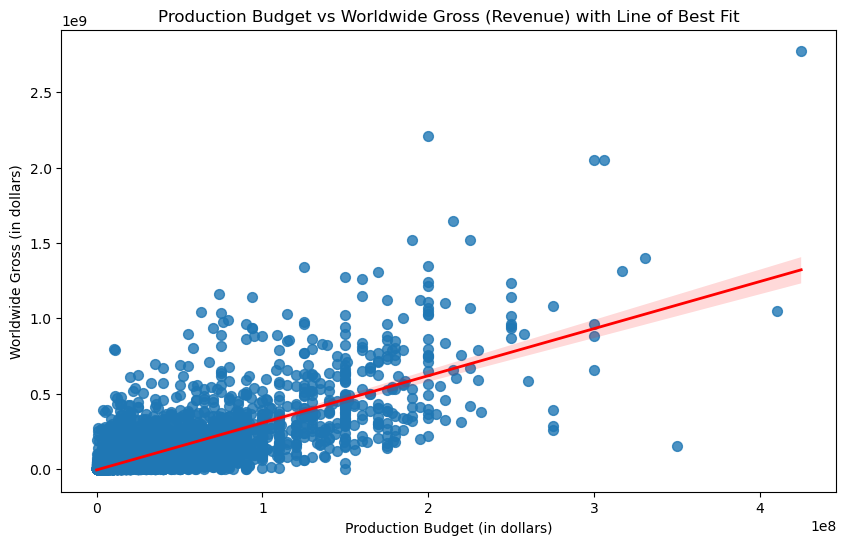

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with a line of best fit to visualize Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=tn, scatter_kws={'s': 50}, line_kws={'color': 'red', 'lw': 2})

# Add labels and title
plt.title('Production Budget vs Worldwide Gross (Revenue) with Line of Best Fit')
plt.xlabel('Production Budget (in dollars)')
plt.ylabel('Worldwide Gross (in dollars)')
plt.show()



There is a positive correlation of  0.748306 between production budget and World-wide gross (Revenue)

In [37]:
# Sort by profitability ratio
high_profitability = tn.sort_values(by='profitability_ratio', ascending=False).head(10)
print(high_profitability[['production_budget', 'worldwide_gross', 'profitability_ratio']])


      production_budget  worldwide_gross  profitability_ratio
5745            25000.0       45000000.0          1800.000000
5613           200000.0       99750000.0           498.750000
5492           450000.0      194183034.0           431.517853
5679           100000.0       41656474.0           416.564740
5406           600000.0      248300000.0           413.833333
5709            65000.0       22233808.0           342.058585
5346           858000.0      268000000.0           312.354312
5773             7000.0        2041928.0           291.704000
5676           114000.0       30087064.0           263.921614
5210          1000000.0      225000000.0           225.000000


Lower budget films can sometimes out perform high budget films when it comes to profitability.this can be seen from the first film which has a budget of 25000 and has the highest profitability ratio.

As budget increases ,there is also a tendency of having diminishing returns in the sense that despite increasing the production budget and having large revenues ,this profitability ratio may be small compared to smaller-budget films.

This clearly shows that a higher production budget is not necessarily an indicator of higher profitability and there are other factors involved in achieving profitability

In [38]:
# Define budget ranges
bins = [0, 1e6, 1e7, 5e7, 1e8, 5e8, 1e9]
labels = ['$0-1M', '$1M-10M', '$10M-50M', '$50M-100M', '$100M-500M', '$500M+']
tn['budget_range'] = pd.cut(tn['production_budget'], bins=bins, labels=labels)

# Calculate the average revenue-to-budget ratio for each budget range
tn['revenue_to_budget'] = tn['worldwide_gross'] / tn['production_budget']
revenue_by_budget_range = tn.groupby('budget_range')['revenue_to_budget'].mean()
print(revenue_by_budget_range)


budget_range
$0-1M         18.637841
$1M-10M        4.203034
$10M-50M       2.865094
$50M-100M      2.594578
$100M-500M     3.194925
$500M+              NaN
Name: revenue_to_budget, dtype: float64


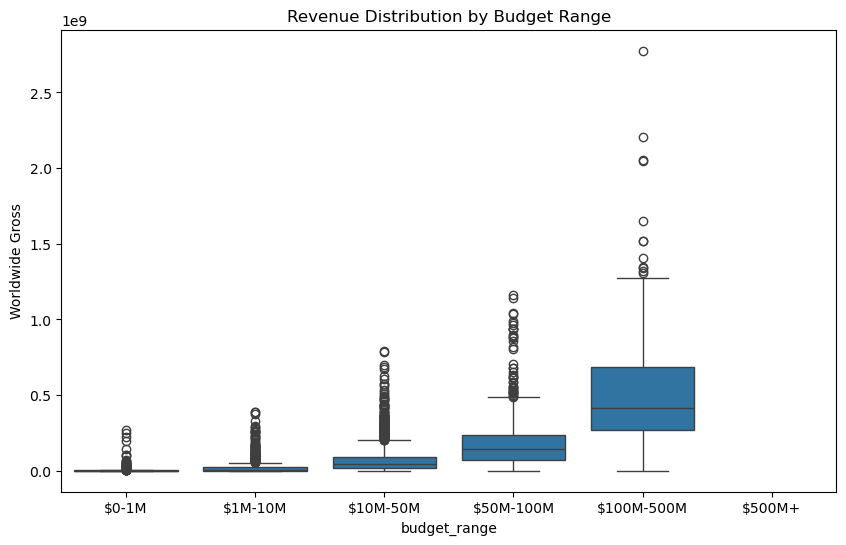

In [39]:
# Box plot to visualize the distribution of worldwide gross across budget ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_range', y='worldwide_gross', data=tn)
plt.title('Revenue Distribution by Budget Range')
plt.xlabel('budget_range')
plt.ylabel('Worldwide Gross')
plt.show()


 As the production budget increases, the revenue-to-budget ratio decreases. Larger-budget films, especially those in the $10M-100M range, are less efficient in turning budget into revenue.
 
Moderate budgets films offer good return on Investment From the ranges in the $1M-10M and $10M-50M they have strong returns, although these returns become more variable as the budget grows.   

# Objective 5.Impact of Movie Cast and Crew on Success:
#### Assess the influence of cast and crew on movie success to guide hiring decisions.

In [40]:
# Execute SQL query using pandas read_sql() and pass the connection
import sqlite3
import pandas as pd
conn = sqlite3.connect(r"C:\Users\josep\Downloads\Compressed\im.db\im.db")

In [41]:
query = "SELECT * FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [42]:
#Select relevant data for computation and set certain cleaning papmeters such as region = US, Death_year Is null and avgrating >=6
imdb = pd.read_sql("""
SELECT mb.movie_id, mb.genres, mr.averagerating AS avg_ratings, mr.numvotes AS num_votes, mk.region, 
pr.category, p.primary_name AS artist_name, mb.runtime_minutes AS screen_time, mb.primary_title AS movie_title, p.death_year
FROM movie_basics mb
JOIN movie_akas mk ON mk.movie_id = mb.movie_id
JOIN movie_ratings mr ON mr.movie_id = mb.movie_id
JOIN principals pr ON pr.movie_id = mb.movie_id
JOIN persons p ON p.person_id = pr.person_id
WHERE mk.region != 'None'
AND p.death_year IS NULL
;""", conn)
#More cleaning using pandas, dropped duplicates, set the defining catagories and dropped missing/empty values from Genre
imdb = imdb.drop_duplicates(subset=['movie_id'])
# Removing duplicate movie names
imdb = imdb.drop_duplicates(subset=['movie_title'])
imdb = imdb.dropna(subset=['genres'])
categories_of_interest = ['actor', 'actress', 'writer', 'director', 'producer']
imdb = imdb[imdb['category'].isin(categories_of_interest)]
#Created a weighted average for rating
imdb['weighted_avg'] = (imdb['avg_ratings'] * imdb['num_votes']) / imdb['num_votes'].sum()
imdb

,movie_id,genres,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg
0,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,1.666936e-02
423,tt0381957,Drama,7.6,23,GB,actor,Derek Jacobi,92.0,Cloud Cuckoo Land,None,7.717939e-07
433,tt0401729,"Action,Adventure,Sci-Fi",6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,7.046051e-03
750,tt10084780,"Drama,Romance",8.3,30,IN,director,Sateesh Chandra Nadella,NaN,Vinara sodara veera kumara,None,1.099409e-06
760,tt1014759,"Adventure,Family,Fantasy",6.5,358813,IE,actor,Johnny Depp,108.0,Alice in Wonderland,None,1.029773e-02
...,...,...,...,...,...,...,...,...,...,...,...
1992082,tt9593792,Horror,6.1,39,TH,director,Mate Yimsomboon,NaN,Ghost Wife,None,1.050399e-06
1992100,tt9644084,Documentary,5.2,5,DE,director,Uli M. Schüppel,95.0,Der Atem,None,1.147977e-07
1992120,tt9657946,Drama,6.0,16,XWW,actor,Marcelo Di Souza,90.0,Homing,None,4.238685e-07
1992144,tt9726638,"Action,Adventure,Comedy",6.0,6,CN,actress,Carman Lee,90.0,Monkey King: The Volcano,None,1.589507e-07


In [43]:
pd.read_sql("""
    SELECT 
        w.*, 
        p.primary_name, 
        ma.title,
        mb.genres,
        ma.language,
        mr.averagerating,
        mr.numvotes
    FROM writers w
    JOIN persons p ON w.person_id = p.person_id
    JOIN movie_basics mb  ON w.movie_id = mb.movie_id
    JOIN movie_akas ma ON w.movie_id = ma.movie_id
    JOIN movie_ratings mr ON w.movie_id = mr.movie_id
    JOIN principals pr USING(movie_id)
    WHERE p.death_year IS NULL
    AND p.primary_profession = 'writer'
    AND (mb.genres LIKE '%Horror%' OR mb.genres LIKE '%Thriller%' OR mb.genres LIKE'%Mystery%')
    AND mr.averagerating >= 7.5
    AND mr.numvotes > 9665
    GROUP BY primary_name
    ORDER BY mr.averagerating DESC
""", conn)

,movie_id,person_id,primary_name,title,genres,language,averagerating,numvotes
0,tt5354160,nm7861818,Adnan Adib Khan,Aynabaji,"Crime,Mystery,Thriller",None,9.3,18470
1,tt8108198,nm4914249,Arijit Biswas,Andhadhun,"Crime,Thriller",None,8.5,43409
2,tt4987556,nm5394336,A.N. Balakrishnan,Double Attack 2,"Action,Crime,Thriller",hi,8.5,13747
3,tt8239946,nm10304029,Narayan Dharap,Tumbbad,"Drama,Fantasy,Horror",None,8.3,14128
4,tt2375559,nm6253319,Hari Prasad Jakka,1 - Nenokkadine,"Action,Mystery,Thriller",None,8.3,41124
5,tt3461252,nm6211716,Ahmed Mourad,Al Feel Al Azrak,"Drama,Horror,Mystery",ar,8.2,21776
6,tt4016934,nm1941029,Seo-kyeong Jeong,A Criada,"Drama,Romance,Thriller",None,8.1,79272
7,tt4016934,nm1258797,Sarah Waters,A Criada,"Drama,Romance,Thriller",None,8.1,79272
8,tt1821480,nm4449370,Nikhil Vyas,A sztori,"Mystery,Thriller",None,8.1,51830
9,tt1821480,nm4298729,Advaita Kala,A sztori,"Mystery,Thriller",None,8.1,51830


In [44]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND
(
primary_title LIKE '%Gallows%' 
OR primary_title LIKE '%Devil Inside%' 
OR primary_title = '%Insidious%' 
OR primary_title = '%Unfriended%' 
OR primary_title LIKE '%Paranormal Activity%' 
OR primary_title = '%Split%' 
OR primary_title = '%Chernobyl Diaries%' 
OR primary_title = '%Annabelle%'
)
AND 
category = 'director'
GROUP BY primary_name
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt3108988,Paranormal Activity Security Squad,Paranormal Activity Security Squad,2016,NaN,"Comedy,Horror",nm2066764,5,nm2066764,director,None,None,Alexander Wraith,1979.0,None,"actor,writer,producer",5.4,13
1,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1413364,5,nm1160962,director,None,None,Ariel Schulman,NaN,None,"writer,producer,director",4.6,58408
2,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",nm3951039,5,nm4000389,director,None,None,Chris Lofing,NaN,None,"producer,director,writer",4.2,17763
3,tt2473682,Paranormal Activity: The Marked Ones,Paranormal Activity: The Marked Ones,2014,84.0,"Horror,Mystery,Thriller",nm0484907,5,nm0484907,director,None,None,Christopher Landon,1975.0,None,"writer,producer,director",5.0,37147
4,tt2417650,30 Nights of Paranormal Activity with the Devi...,30 Nights of Paranormal Activity with the Devi...,2013,80.0,Comedy,nm0608936,5,nm0608936,director,None,None,Craig Moss,NaN,None,"director,writer,producer",2.6,3381
5,tt2473510,Paranormal Activity: The Ghost Dimension,Paranormal Activity: The Ghost Dimension,2015,88.0,"Horror,Mystery,Thriller",nm0687427,5,nm0687427,director,None,None,Gregory Plotkin,NaN,None,"editorial_department,editor,producer",4.6,22361
6,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1160962,5,nm1160962,director,None,None,Henry Joost,NaN,None,"writer,producer,director",4.6,58408
7,tt1990211,The Devil Inside Me,Duo ming xin tiao,2011,90.0,"Horror,Thriller",nm3814942,5,nm3814942,director,None,None,Qi Zhang,NaN,None,"writer,director,actor",5.6,59
8,tt1649749,Demon Exorcism: The Devil Inside Maxwell Bastas,Demon Equation,2013,NaN,Horror,nm3157118,5,nm3157118,director,None,None,Richard G. James,NaN,None,"director,writer,editor",5.5,35
9,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,nm0931095,5,nm0931095,director,None,None,Tod Williams,1968.0,None,"director,writer,producer",5.7,93122


In [45]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND (
    primary_title LIKE '%Gallows%' 
    OR primary_title LIKE '%Devil Inside%' 
    OR primary_title LIKE '%Insidious%' 
    OR primary_title LIKE '%Unfriended%' 
    OR primary_title LIKE '%Paranormal Activity%' 
    OR primary_title LIKE '%Split%' 
    OR primary_title LIKE '%Chernobyl Diaries%' 
    OR primary_title LIKE '%Annabelle%'
)
AND mr.averagerating >= 7.5
AND category IN ('actor', 'actress')
GROUP BY primary_name;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt1537385,Annabelle & Bear,Annabelle & Bear,2010,100.0,Drama,nm3672532,1,nm0557478,actor,None,"[""Bear""]",Amy S. Weber,NaN,None,"producer,director,writer",8.0,53
1,tt3168478,Split Gas,Split Gas,2014,71.0,"Comedy,Drama",nm4839546,1,nm4587628,actress,None,"[""Otey""]",Jacques Edeline,NaN,None,"writer,actor,sound_department",8.3,7
2,tt8451712,Babysplitters,Babysplitters,2019,119.0,Comedy,nm1153627,1,nm0275417,actor,None,"[""Dr. Cooper, MFT""]",Sam Friedlander,1978.0,None,"producer,production_manager,director",9.3,77
3,tt2467370,Split Second,Split Second,2012,83.0,Drama,nm5394959,1,nm4244738,actor,None,"[""Mike Yancey""]",Timothy Fontaine,NaN,None,"cinematographer,editor,director",8.1,11


In [46]:
expanded_data = []
for _, row in merged_tn_imdb.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        new_row = row.copy()
        new_row['genres'] = genre.strip()
        expanded_data.append(new_row)

merged_tn_imdb = pd.DataFrame(expanded_data)


In [47]:
# Filter the dataset to find directors who:
# - Are listed as the 'director' in the category column
# - Have directed movies in the genres Horror, Thriller, or Mystery
# - Have an average movie rating (avg_ratings) of 7 or higher
# - Have a significant number of audience votes (num_votes >= 9000)
directors = merged_tn_imdb[(merged_tn_imdb['category'] == 'director') & 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery')) &
                           (merged_tn_imdb['avg_ratings'] >= 7) &
                           (merged_tn_imdb['num_votes'] >= 9000)]

# Sort the filtered directors by average ratings in descending order
directors = directors.sort_values(by='avg_ratings', ascending=False)

# Get the top 5 unique directors
top_5_directors = directors['artist_name'].drop_duplicates().head(5)

# Print the names of the top 5 directors
print("Top 5 Directors:")
for director in top_5_directors:
    print(director)

Top 5 Directors:
David Fincher
John Madden
Kathryn Bigelow
Derek Cianfrance
Oliver Stone


#### Bar Chart of Top Directors by Average Ratings

The bar chart highlights the top directors with the highest average ratings.

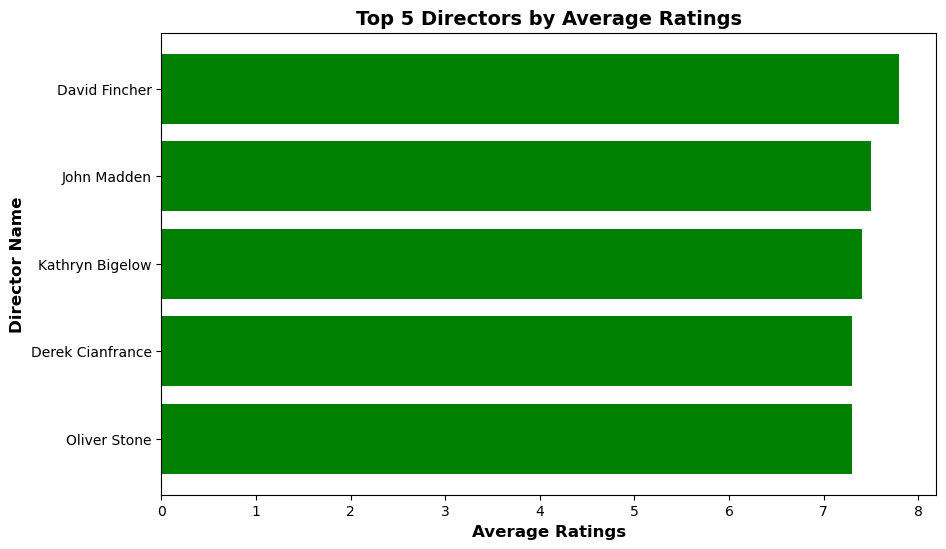

In [48]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(directors['artist_name'], directors['avg_ratings'], color='green')
plt.xlabel('Average Ratings', fontsize=12, fontweight='bold')
plt.ylabel('Director Name', fontsize=12, fontweight='bold')
plt.title('Top 5 Directors by Average Ratings', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

The bar chart highlights that Director David Fincher consistently achieves the highest average ratings among directors who specialize in the genres of Horror, Thriller, or Mystery. This suggests his exceptional skill in crafting compelling narratives within these genres, making him a standout among his peers.

#### Scatter Plot of Directors: Ratings vs. Number of Votes

Show the relationship between the number of votes a director's movies receive and their average ratings.

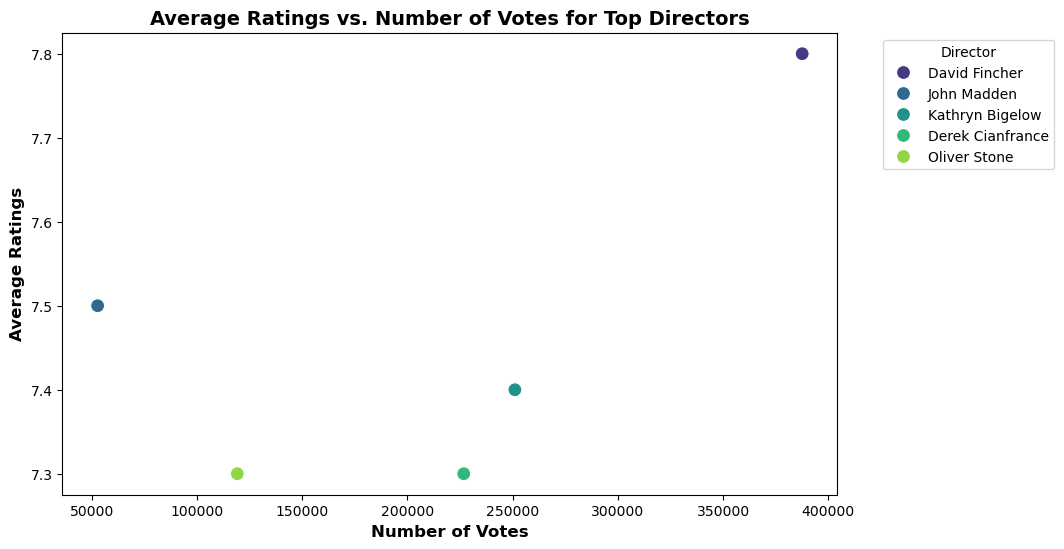

In [49]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=directors, x='num_votes', y='avg_ratings', hue='artist_name', s=100, palette='viridis')
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Average Ratings vs. Number of Votes for Top Directors', fontsize=14, fontweight='bold')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

David Fincher's movies stand out as they not only have consistently high ratings (above 7) but also receive a significant number of votes, indicating widespread recognition and appreciation from audiences.

The scatter plot emphasizes his exceptional performance compared to other directors by visually highlighting his movies as a cluster or outliers with high ratings and votes.

The pattern observed in the plot suggests that Fincher's works appeal to both critics (high ratings) and a large audience base (high votes), underlining his unique position as a director whose films are both critically acclaimed and commercially successful.

#### Genre Distribution of Selected Directors

Provides insights into which genres are most prevalent among these high-rated directors.

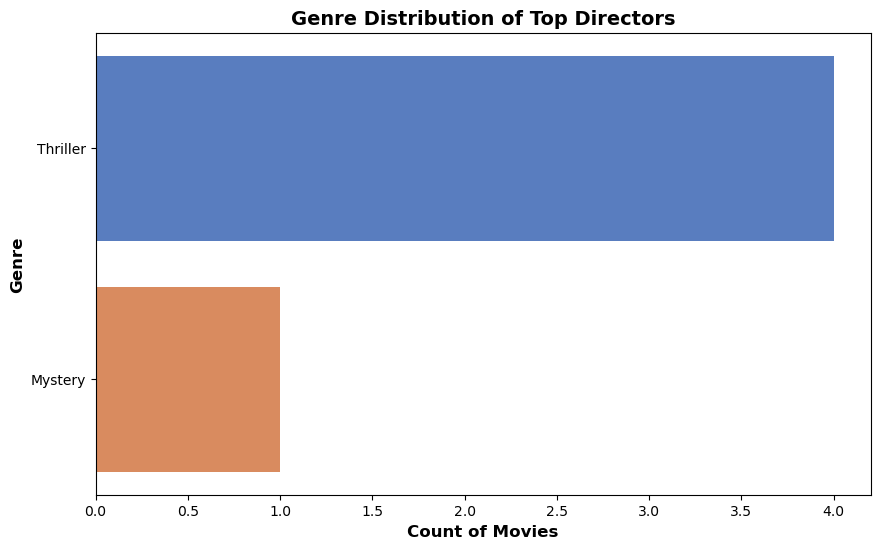

In [50]:
genre_counts = directors['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='muted')
plt.xlabel('Count of Movies', fontsize=12, fontweight='bold')
plt.ylabel('Genre', fontsize=12, fontweight='bold')
plt.title('Genre Distribution of Top Directors', fontsize=14, fontweight='bold')
plt.show()


Thriller and Mystery genres dominate the chart, indicating that the majority of the high-rated movies directed by these top directors fall into these categories. This suggests that these genres are particularly popular or well-executed by the directors in question.

Audience Preference: The prominence of Thriller and Mystery genres could reflect audience preferences, as these genres often involve engaging and suspenseful storytelling, which tends to resonate well with viewers.

Critical Acclaim: Movies within the Thriller and Mystery genres are often crafted with intricate plots and compelling narratives, which may lead to higher ratings, further boosting their representation in this dataset.

Genre Mastery by Directors: The leading directors might have a specialization or particular strength in crafting Thriller and Mystery films, contributing to their dominance in these genres.

#### Bubble Chart: Ratings vs. Votes with Genre as a Dimension

 Combines multiple dimensions to analyze the influence of genres on ratings and popularity.

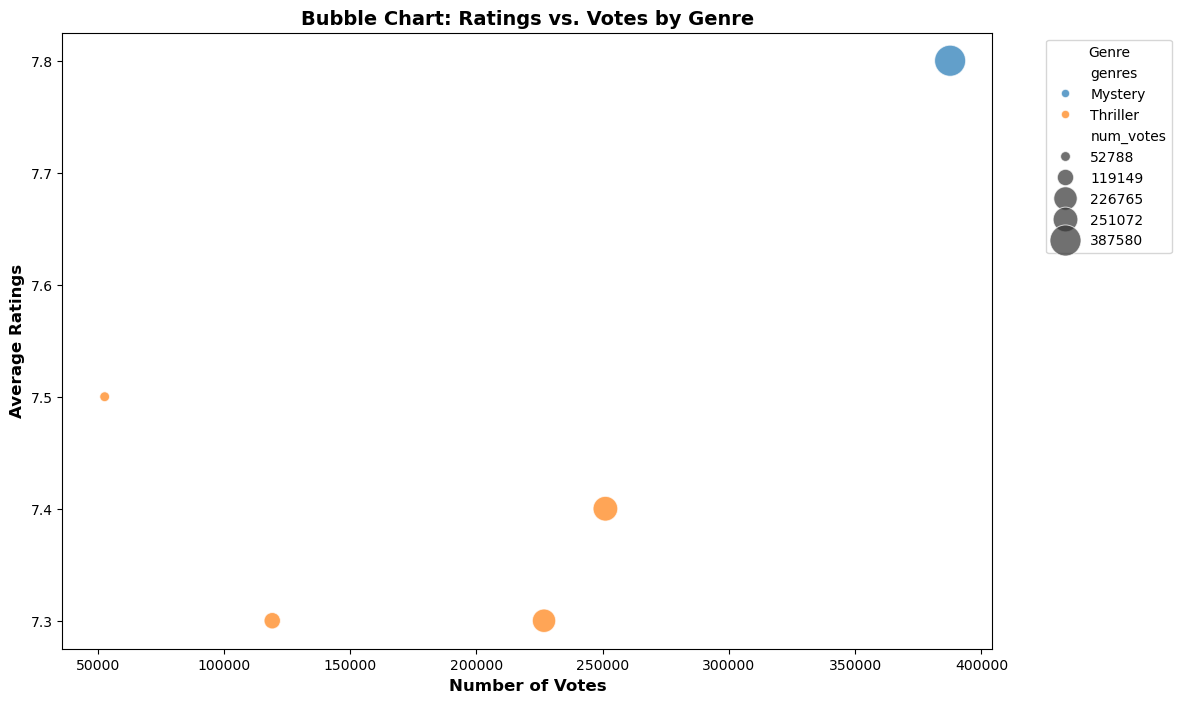

In [51]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=directors, x='num_votes', y='avg_ratings', size='num_votes', hue='genres', alpha=0.7, sizes=(50, 500)
)
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Bubble Chart: Ratings vs. Votes by Genre', fontsize=14, fontweight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Mystery Genre Leading in Ratings and Votes:
The Mystery genre stands out, with many films from this category appearing in the top-right quadrant of the plot. This quadrant indicates movies with high average ratings and a large number of votes, suggesting that Mystery films are not only popular but also critically acclaimed.

Director Strength in Mystery Genre:
The directors associated with the Mystery genre are achieving strong ratings and a large volume of votes, possibly due to their ability to captivate audiences with complex and engaging plots. These movies seem to have a broad appeal, encouraging high levels of viewer participation and feedback (as indicated by the number of votes).

Hues Representing Genres:
The color-coded hues (Mystery) dominate the scatter plot, visually emphasizing its prominence in both ratings and votes. This highlights that Mystery films tend to attract both a large audience and positive reviews, making them a standout genre for the directors in this dataset.

Genre Popularity:
The Mystery genre's significant presence in both axes indicates that it is a strong performer among high-rated films, potentially due to the suspenseful and thought-provoking nature of the genre, which keeps audiences engaged and coming back for more.

In [52]:
Actors_Actress = merged_tn_imdb[(merged_tn_imdb['category'].isin(['actor','actress']))& 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery'))&
                           (merged_tn_imdb['avg_ratings'] >= 7.5) &
                           (merged_tn_imdb['num_votes'] >= 9000)]

# Get the unique names from the 'artist_name' column
Actors_Actress = Actors_Actress['artist_name'].unique()


print("Actors and Actress:")
for name in Actors_Actress:
    print(name)

Actors and Actress:
Leonardo DiCaprio
Natalie Portman
Ben Affleck
John C. Reilly
Tom Hanks
Gary Oldman
Rene Russo
Javier Bardem
Lubna Azabal
Matthew Goode
Lili Taylor
Forest Whitaker
Samuel L. Jackson
Sandra Bullock
Ewan McGregor
Harrison Ford
Sean Bridgers
Catherine Keener


#### Bar Chart of Number of Movies per Actor/Actress:

This visualization can help you see which actors and actresses have appeared in the highest number of movies within the specified genres (Horror, Thriller, and Mystery) with high ratings and votes.

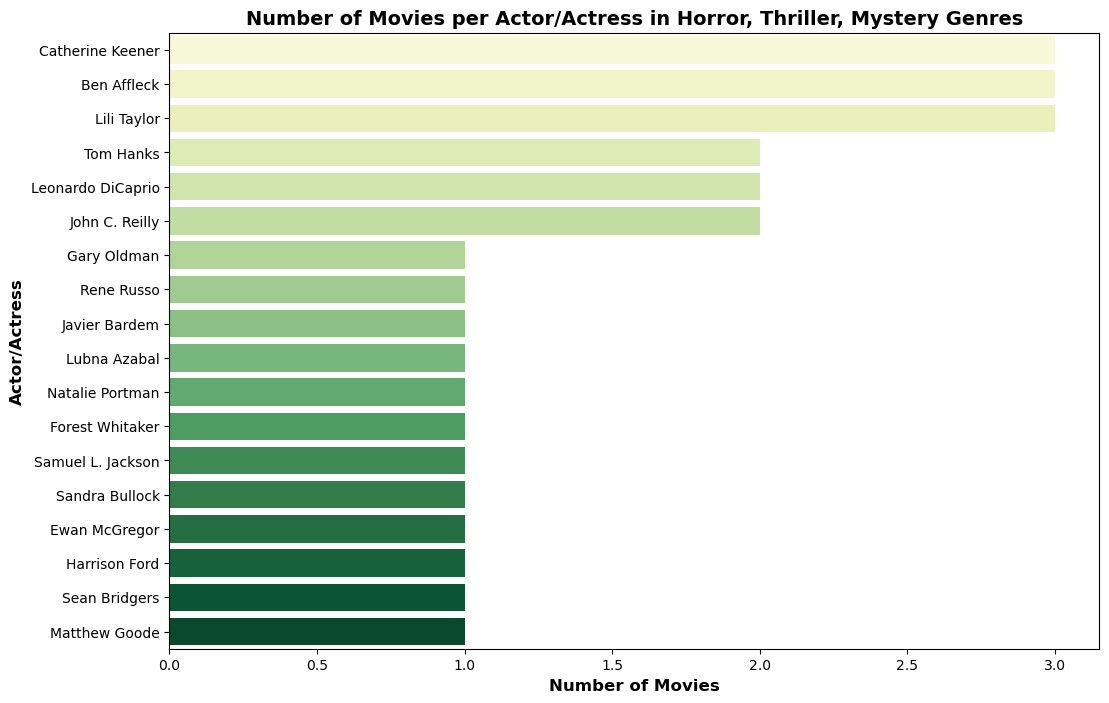

In [53]:
# Count the occurrences of each actor/actress in the filtered dataset
actor_counts = merged_tn_imdb[(merged_tn_imdb['category'].isin(['actor', 'actress'])) & 
                              (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery')) & 
                              (merged_tn_imdb['avg_ratings'] >= 7.5) & 
                              (merged_tn_imdb['num_votes'] >= 9000)]

actor_counts = actor_counts['artist_name'].value_counts().reset_index()
actor_counts.columns = ['Actor/Actress', 'Movie Count']

# Plot a bar chart where the x-axis represents actors/actresses and the y-axis represents the number of movies
plt.figure(figsize=(12, 8))
sns.barplot(data=actor_counts, x='Movie Count', y='Actor/Actress', palette='YlGn')
plt.xlabel('Number of Movies', fontsize=12, fontweight='bold')
plt.ylabel('Actor/Actress', fontsize=12, fontweight='bold')
plt.title('Number of Movies per Actor/Actress in Horror, Thriller, Mystery Genres', fontsize=14, fontweight='bold')
plt.show()

In the plot, Catherine Keener, Lili Taylor, Ben Affleck, John C. Reilly, Tom Hanks, Harrison Ford, and Ewan McGregor are shown as the leading actors and actresses in Horror, Thriller, and Mystery genres with ratings above 7.5 and substantial audience engagement (over 9000 votes). This suggests that these actors/actresses have consistently appeared in top-rated films within these genres, making significant contributions to their success. Their repeated appearances across these genres demonstrate their strong on-screen presence, versatility, and appeal to both critics and large audiences.

#### Scatter Plot of Actor/Actress Performance (Ratings vs. Number of Votes)

This visualization can help explore the relationship between average ratings and number of votes for each actor or actress in the specified genres. It will show how popular and highly-rated the movies are that feature these actors/actresses.

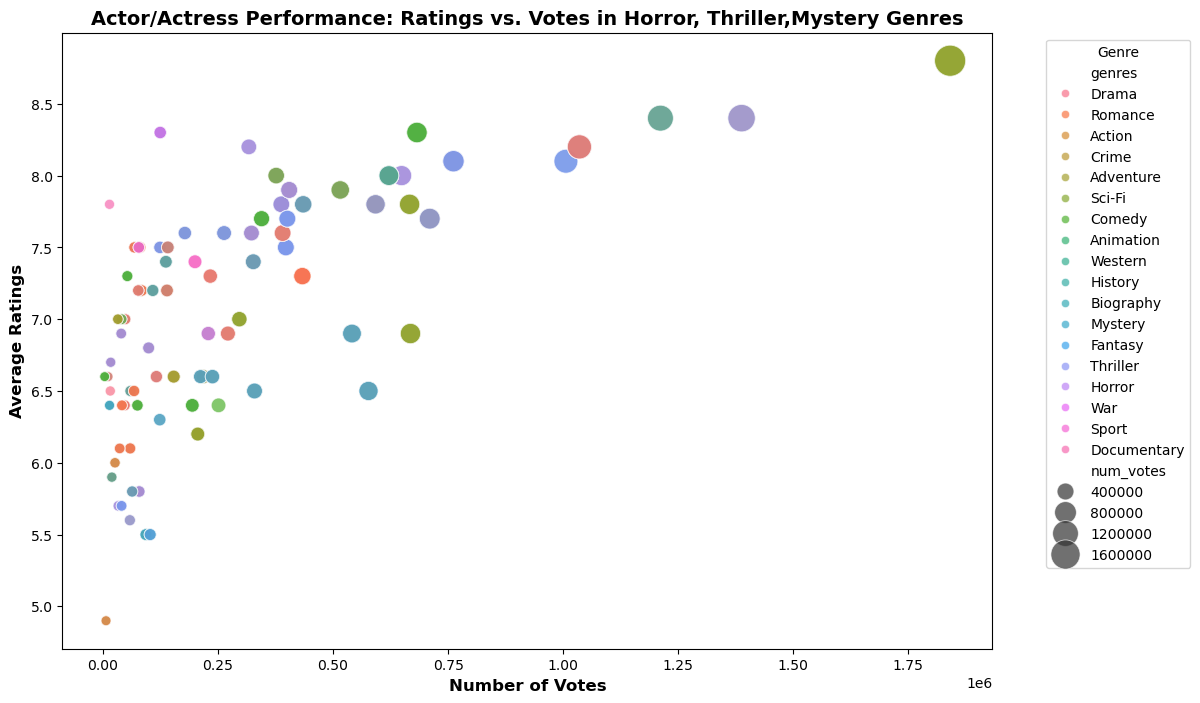

In [54]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_tn_imdb[(merged_tn_imdb['artist_name'].isin(Actors_Actress))], 
                x='num_votes', y='avg_ratings', hue='genres', size='num_votes', alpha=0.7, sizes=(50, 500))
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Actor/Actress Performance: Ratings vs. Votes in Horror, Thriller,Mystery Genres',
          fontsize=14, fontweight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Sci-Fi: This genre often attracts large, dedicated audiences due to its imaginative nature and expansive storytelling possibilities. Sci-Fi films, especially those with a high rating and substantial audience engagement (votes), indicate that viewers appreciate the world-building, visual effects, and sometimes the thought-provoking themes Sci-Fi offers.

Comedy: Comedy remains a consistent favorite among moviegoers. A high number of movies in this genre with ratings over 7.5 suggest that these films tend to perform well, with a broad appeal that ensures steady viewership and favorable reviews. Comedy’s universal appeal is a likely factor in its prevalence among top-rated films.

Thriller: Thriller films consistently draw large audiences due to their suspenseful and engaging narratives. Thrillers often feature gripping plots, which can generate strong word-of-mouth and repeat viewing, leading to high ratings and significant votes.

In [55]:
Writers = merged_tn_imdb[(merged_tn_imdb['category'].isin(['writer'])) & 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller'))&
                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

# Get the unique names from the 'artist_name' column
Writers = Writers.sort_values(by='avg_ratings', ascending=False)['artist_name'].unique()

# Print the director names
print("Best Writers:")
for name in Writers:
    print(name)

Best Writers:
Stephen King
Dario Argento
Phil Hay
Shawn Christensen
John Carpenter
Colin Bateman
Jim Vines
Sam Raimi


#### Bar Chart (Top Writers by Average Ratings)

This chart would show the best writers sorted by their average ratings, allowing you to easily visualize which writers have the highest average ratings in the Horror and Thriller genres.

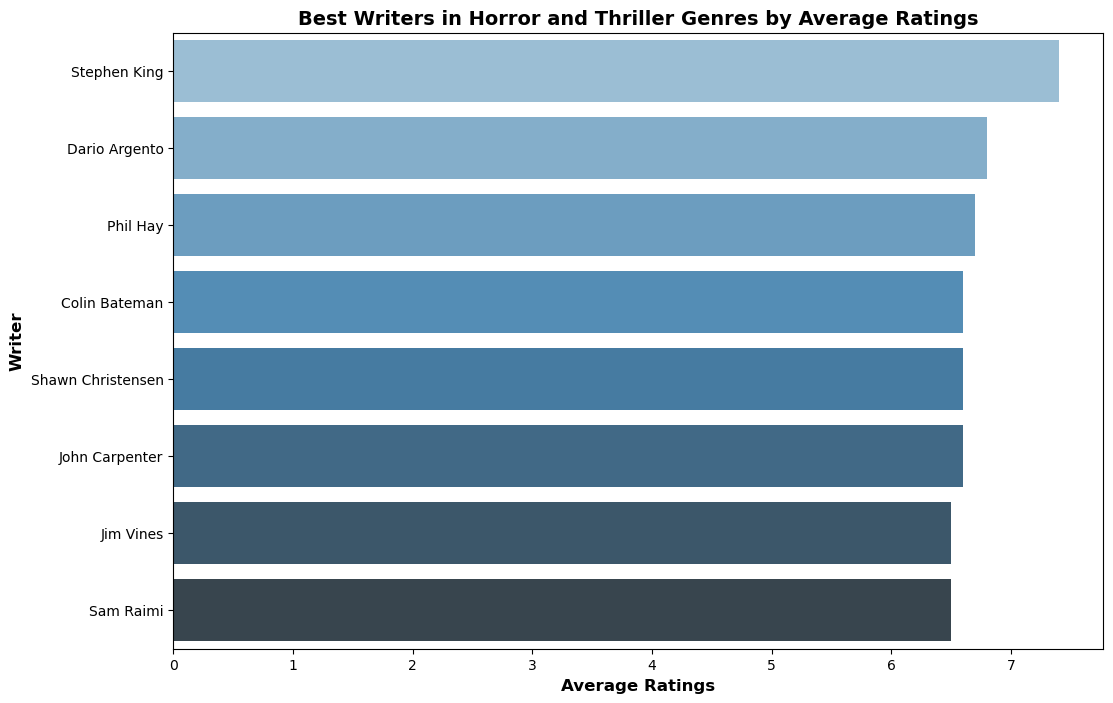

In [56]:
# Count the occurrences of each writer in the filtered dataset
writer_counts = Writers = merged_tn_imdb[(merged_tn_imdb['category'] == 'writer') & 
                                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller')) &
                                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

writer_counts = writer_counts.groupby('artist_name').agg({'avg_ratings': 'mean', 'genres': 'count'}).reset_index()
writer_counts = writer_counts.sort_values(by='avg_ratings', ascending=False)

# Plot a bar chart where x-axis represents writers and y-axis represents average ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=writer_counts, x='avg_ratings', y='artist_name', palette='Blues_d')
plt.xlabel('Average Ratings', fontsize=12, fontweight='bold')
plt.ylabel('Writer', fontsize=12, fontweight='bold')
plt.title('Best Writers in Horror and Thriller Genres by Average Ratings', fontsize=14, fontweight='bold')
plt.show()

#### Word Cloud (Most Frequent Writers)

The word cloud visualization will allow you to quickly spot the most frequently occurring writers, and it’s a great way to highlight trends visually. Writers who have contributed more will be shown in larger fonts.

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the occurrences of each writer in the dataset
writer_counts = Writers = merged_tn_imdb[(merged_tn_imdb['category'] == 'writer') & 
                                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller')) &
                                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

writer_frequency = writer_counts['artist_name'].value_counts()

# Create a word cloud
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(writer_frequency)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Writers in Horror and Thriller Genres', fontsize=14, fontweight='bold')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

#### Prominent Writers:

Sam Raimi stands out as the largest word in the cloud, indicating that he is the most frequently appearing writer in this dataset for the Horror and Thriller genres. His extensive body of work in these genres makes him a notable figure in both categories.

Colin Bateman and Dario Argento follows closely behind, suggesting his frequent contributions to the genres as well, particularly in the Thriller category, where his name is synonymous with iconic works.

Other Notable Writers:

Phil Hay, , John Carpenter, and Stephen King also appear prominently in the cloud, showcasing their significant roles in shaping the Horror and Thriller genres. These writers have consistently produced content that resonates with audiences, as reflected in their repeated presence in high-rated films.
Interpretation of Size and Frequency:

The size of the names in the word cloud is proportional to the number of films written by each author in these genres, meaning the larger the name, the more frequently they appear in this dataset. This gives a quick visual cue of the most influential and prolific writers in the space.